<a href="https://colab.research.google.com/github/smiling621/PRODIGY_DS_02/blob/main/prodigy_task_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#here we load the dataset
df = pd.read_csv("/content/train.csv")


In [3]:
#shows the first 5 rows of dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#prints the brief but comprehensive summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#generates descriptive statistics.
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
#handles the missing values
df['Age'].fillna(df['Age'].median(), inplace=True) #fills missing value in age column
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)#fills missing values in embarked column
df.drop(columns='Cabin', inplace=True)#drops the cabin column from df

In [7]:
df.drop_duplicates(inplace=True) #removes duplicate rows

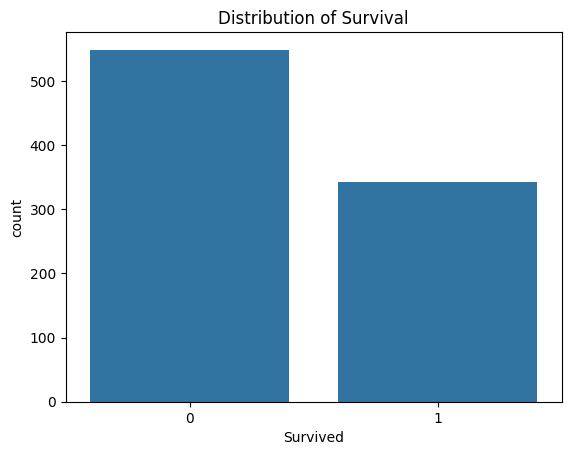

In [8]:
#displays a countplot
sns.countplot(data=df, x='Survived')
plt.title('Distribution of Survival')
plt.show()

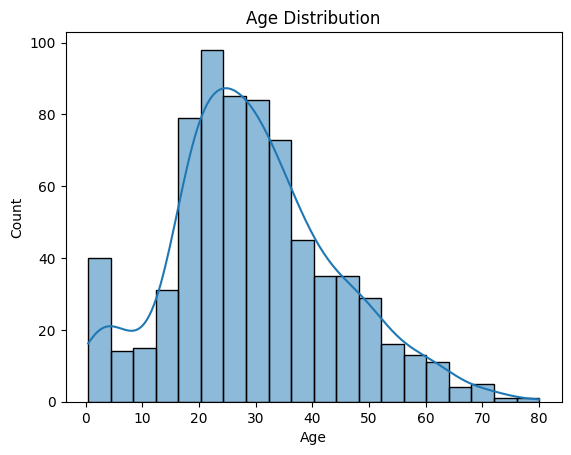

In [9]:
#creates and displays histogram of age
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

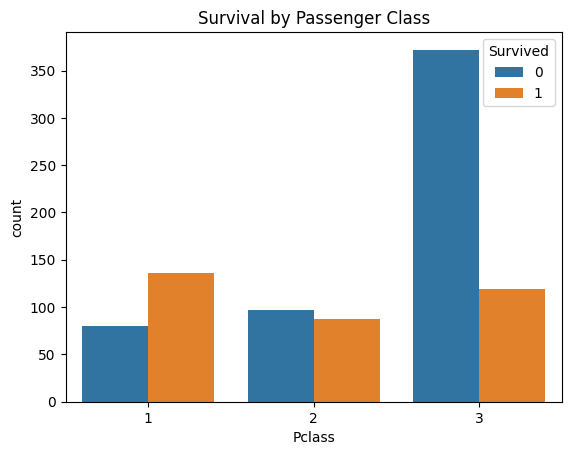

In [10]:
#displays a count plot of the 'Pclass' column
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.show()

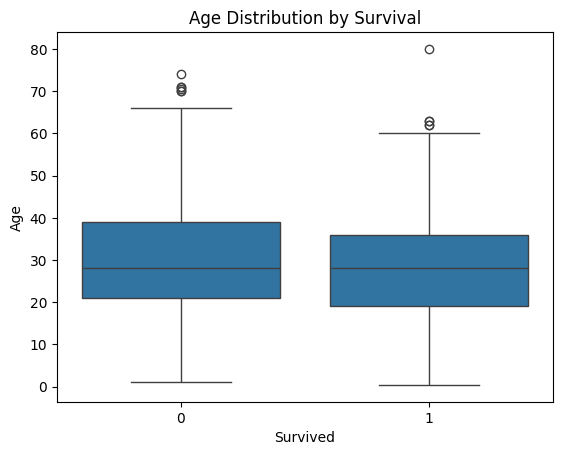

In [11]:
#displays boxplot
sns.boxplot(data=df, x='Survived', y='Age')
plt.title('Age Distribution by Survival')
plt.show()

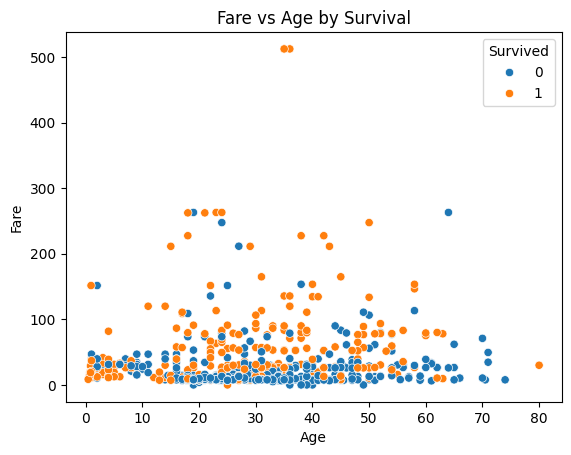

In [12]:
#displays scatterplot of age vs fare.
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.title('Fare vs Age by Survival')
plt.show()


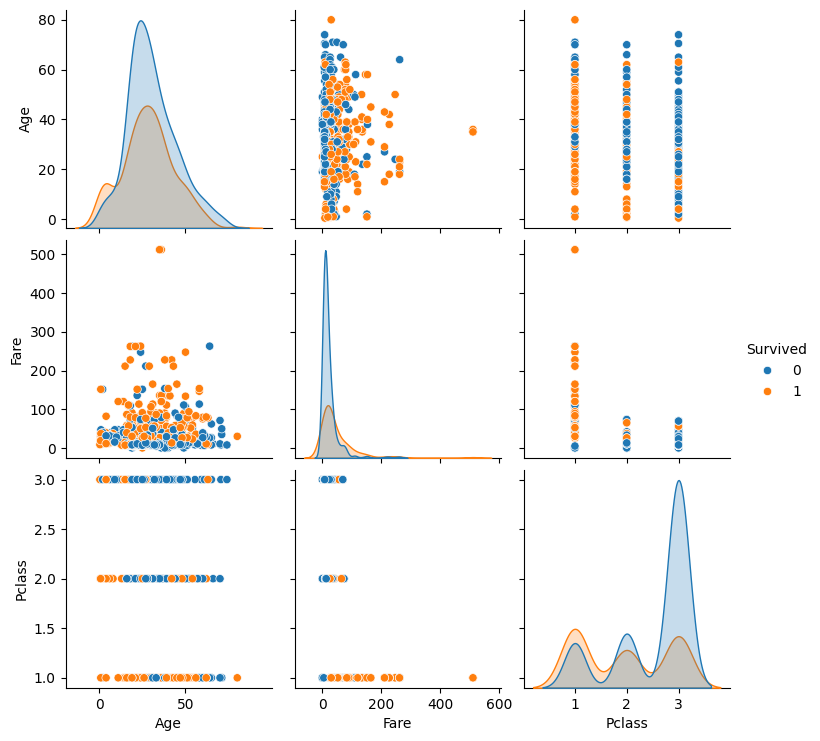

In [13]:
#generates pairplot using seaborn
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived')
plt.show()

In [18]:
#selects only numerical columns
numeric_df = df.select_dtypes(include=[np.number])

In [19]:
#computes
corr_matrix = numeric_df.corr()

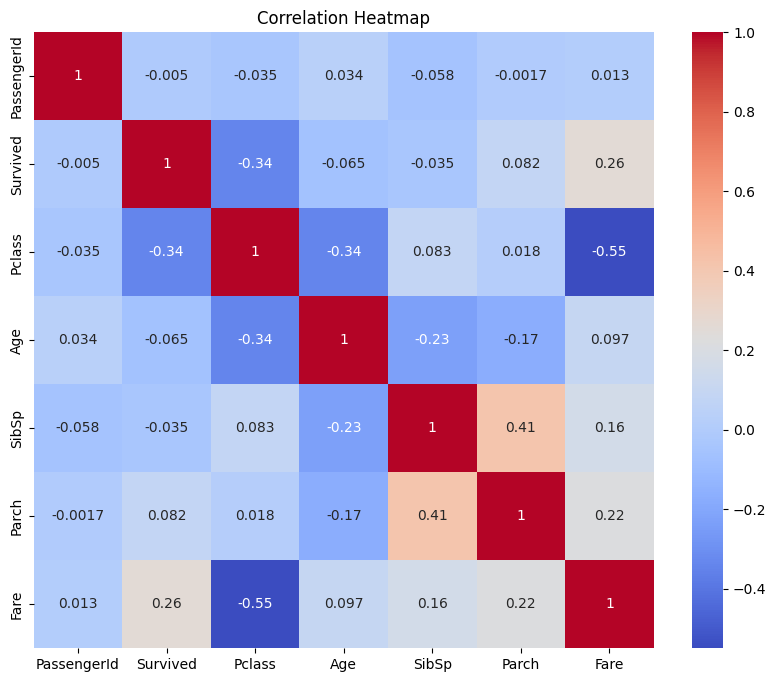

In [20]:
#displays heatmap of correlation between numerical variables in df
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()